In [1]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome import service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys 
import os 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd


In [2]:
driver = webdriver.Chrome('./chromedriver')

In [129]:
sear = pd.read_excel('datatrend01.xls', header=0)
# 캠핑장, 캠핑카, 캠핑 용품, 텐트, 침낭 검색어를 나이+ 성별 별로 정리한 데이터셋
sear

,일,캠핑장10여,캠핑카10여,캠핑 용품10여,텐트10여,침낭10여,캠핑장10남,캠핑카10남,캠핑 용품10남,텐트10남,...,캠핑장60여,캠핑카60여,캠핑 용품60여,텐트60여,침낭60여,캠핑장60남,캠핑카60남,캠핑 용품60남,텐트60남,침낭60남
0,2020-01-06,2,15,7,4,4,2,15,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-13,2,14,7,4,4,2,14,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-20,2,12,6,3,2,2,12,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,2,16,6,4,3,2,16,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-03,2,28,8,4,3,2,28,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022-02-28,4,13,9,5,2,4,13,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2022-03-07,4,11,8,6,2,4,11,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2022-03-14,5,15,9,7,2,5,15,9,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,2022-03-21,6,14,12,7,2,6,14,12,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
sear['캠핑장60남'] = sear['캠핑장50남'] * 570/1687
sear['캠핑카60남'] = sear['캠핑카50남'] * 1951/3497
sear['캠핑 용품60남'] = sear['캠핑 용품50남'] * 1746/3000
sear['텐트60남'] = sear['텐트50남'] * 1473/2662
sear['침낭60남'] = sear['침낭50남'] * 1453/3243
sear['캠핑장60여'] = sear['캠핑장50여'] * 143/656
sear['캠핑카60여'] = sear['캠핑카50여'] * 291/986
sear['캠핑 용품60여'] = sear['캠핑 용품50여'] * 358/1348
sear['텐트60여'] = sear['텐트50여'] * 302/887
sear['침낭60여'] = sear['침낭50여'] * 277/1081
# 미리 구해둔 비율에 맞춰서 나이, 성별별로 데이터셋의 결측치 값들을 채워줌

In [149]:
sear

,일,캠핑장10여,캠핑카10여,캠핑 용품10여,텐트10여,침낭10여,캠핑장10남,캠핑카10남,캠핑 용품10남,텐트10남,...,캠핑장60여,캠핑카60여,캠핑 용품60여,텐트60여,침낭60여,캠핑장60남,캠핑카60남,캠핑 용품60남,텐트60남,침낭60남
0,2020-01-06,1.250,6.0,2.8,2.545455,2.0,0.750,9.0,4.2,1.454545,...,35.750,436.5,501.2,109.818182,138.500,142.50,2926.5,2444.4,535.636364,726.500
1,2020-01-13,1.250,5.6,2.8,2.545455,2.0,0.750,8.4,4.2,1.454545,...,35.750,407.4,501.2,109.818182,138.500,142.50,2731.4,2444.4,535.636364,726.500
2,2020-01-20,1.250,4.8,2.4,1.909091,1.0,0.750,7.2,3.6,1.090909,...,35.750,349.2,429.6,82.363636,69.250,142.50,2341.2,2095.2,401.727273,363.250
3,2020-01-27,1.250,6.4,2.4,2.545455,1.5,0.750,9.6,3.6,1.454545,...,35.750,465.6,429.6,109.818182,103.875,142.50,3121.6,2095.2,535.636364,544.875
4,2020-02-03,1.250,11.2,3.2,2.545455,1.5,0.750,16.8,4.8,1.454545,...,35.750,814.8,572.8,109.818182,103.875,142.50,5462.8,2793.6,535.636364,544.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022-02-28,2.500,5.2,3.6,3.181818,1.0,1.500,7.8,5.4,1.818182,...,71.500,378.3,644.4,137.272727,69.250,285.00,2536.3,3142.8,669.545455,363.250
120,2022-03-07,2.500,4.4,3.2,3.818182,1.0,1.500,6.6,4.8,2.181818,...,71.500,320.1,572.8,164.727273,69.250,285.00,2146.1,2793.6,803.454545,363.250
121,2022-03-14,3.125,6.0,3.6,4.454545,1.0,1.875,9.0,5.4,2.545455,...,89.375,436.5,644.4,192.181818,69.250,356.25,2926.5,3142.8,937.363636,363.250
122,2022-03-21,3.750,5.6,4.8,4.454545,1.0,2.250,8.4,7.2,2.545455,...,107.250,407.4,859.2,192.181818,69.250,427.50,2731.4,4190.4,937.363636,363.250


In [169]:
search = pd.read_csv('검색량 데이터.csv', index_col=0)
search

,일,캠핑장10여,캠핑카10여,캠핑 용품10여,텐트10여,침낭10여,캠핑장10남,캠핑카10남,캠핑 용품10남,텐트10남,...,캠핑 30대 남성,캠핑 40대 남성,캠핑 50대 남성,캠핑 60대 남성,캠핑 10대 여성,캠핑 20대 여성,캠핑 30대 여성,캠핑 40대 여성,캠핑 50대 여성,캠핑 60대 여성
0,2020-01-06,1.250,6.0,2.8,2.545455,2.0,0.750,9.0,4.2,1.454545,...,2946.463636,16975.990909,12456.750,6775.536364,14.595455,227.013636,2146.359091,8757.090909,4393.245455,1221.768182
1,2020-01-13,1.250,5.6,2.8,2.545455,2.0,0.750,8.4,4.2,1.454545,...,2875.963636,16518.590909,12107.050,6580.436364,14.195455,221.513636,2097.359091,8541.890909,4294.645455,1192.668182
2,2020-01-20,1.250,4.8,2.4,1.909091,1.0,0.750,7.2,3.6,1.090909,...,2293.072727,13284.818182,9754.900,5343.877273,11.359091,180.722727,1701.781818,6961.218182,3476.959091,966.163636
3,2020-01-27,1.250,6.4,2.4,2.545455,1.5,0.750,9.6,3.6,1.454545,...,2764.663636,16075.440909,11801.075,6439.811364,14.095455,214.063636,2015.134091,8249.290909,4087.120455,1144.643182
4,2020-02-03,1.250,11.2,3.2,2.545455,1.5,0.750,16.8,4.8,1.454545,...,3888.263636,23094.640909,17197.475,9479.411364,19.695455,304.463636,2830.334091,11769.690909,5809.520455,1637.043182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022-02-28,2.500,5.2,3.6,3.181818,1.0,1.500,7.8,5.4,1.818182,...,3091.154545,17688.863636,12810.350,6996.895455,15.481818,246.754545,2339.786364,9466.963636,4709.631818,1300.722727
120,2022-03-07,2.500,4.4,3.2,3.818182,1.0,1.500,6.6,4.8,2.181818,...,2887.445455,16377.136364,11752.950,6391.404545,14.918182,228.645455,2178.913636,8740.836364,4323.468182,1198.377273
121,2022-03-14,3.125,6.0,3.6,4.454545,1.0,1.875,9.0,5.4,2.545455,...,3463.836364,19797.459091,14204.625,7726.163636,18.179545,274.811364,2612.615909,10512.409091,5150.104545,1431.706818
122,2022-03-21,3.750,5.6,4.8,4.454545,1.0,2.250,8.4,7.2,2.545455,...,3889.236364,22092.909091,15865.800,8649.913636,19.604545,312.786364,2977.790909,11972.709091,5942.304545,1635.281818


In [166]:
sear.to_csv('검색량 데이터.csv')

In [157]:
sear['캠핑 10대 남성'] = sear['캠핑장10남'] + sear['캠핑카10남']+sear['캠핑 용품10남']+sear['텐트10남']+sear['침낭10남']
sear['캠핑 20대 남성'] = sear['캠핑장20남'] + sear['캠핑카20남']+sear['캠핑 용품20남']+sear['텐트20남']+sear['침낭20남']
sear['캠핑 30대 남성'] = sear['캠핑장30남'] + sear['캠핑카30남']+sear['캠핑 용품30남']+sear['텐트30남']+sear['침낭30남']
sear['캠핑 40대 남성'] = sear['캠핑장40남'] + sear['캠핑카40남']+sear['캠핑 용품40남']+sear['텐트40남']+sear['침낭40남']
sear['캠핑 50대 남성'] = sear['캠핑장50남'] + sear['캠핑카50남']+sear['캠핑 용품50남']+sear['텐트50남']+sear['침낭50남']
sear['캠핑 60대 남성'] = sear['캠핑장60남'] + sear['캠핑카60남']+sear['캠핑 용품60남']+sear['텐트60남']+sear['침낭60남']

sear['캠핑 10대 여성'] = sear['캠핑장10여'] + sear['캠핑카10여']+sear['캠핑 용품10여']+sear['텐트10여']+sear['침낭10여']
sear['캠핑 20대 여성'] = sear['캠핑장20여'] + sear['캠핑카20여']+sear['캠핑 용품20여']+sear['텐트20여']+sear['침낭20여']
sear['캠핑 30대 여성'] = sear['캠핑장30여'] + sear['캠핑카30여']+sear['캠핑 용품30여']+sear['텐트30여']+sear['침낭30여']
sear['캠핑 40대 여성'] = sear['캠핑장40여'] + sear['캠핑카40여']+sear['캠핑 용품40여']+sear['텐트40여']+sear['침낭40여']
sear['캠핑 50대 여성'] = sear['캠핑장50여'] + sear['캠핑카50여']+sear['캠핑 용품50여']+sear['텐트50여']+sear['침낭50여']
sear['캠핑 60대 여성'] = sear['캠핑장60여'] + sear['캠핑카60여']+sear['캠핑 용품60여']+sear['텐트60여']+sear['침낭60여']

# 성별, 나이별로 여러 검색어들로 나눠진 검색어 비율값들을 하나로 합침


In [159]:
sear_columns = ['일','캠핑 10대 남성', '캠핑 20대 남성','캠핑 30대 남성','캠핑 40대 남성','캠핑 50대 남성','캠핑 60대 남성','캠핑 10대 여성','캠핑 20대 여성','캠핑 30대 여성','캠핑 40대 여성','캠핑 50대 여성','캠핑 60대 여성']
searcher = sear[sear_columns]
searcher
# 주별로 캠핑 관련 검색어 검색 수치 비율 데이터셋

,일,캠핑 10대 남성,캠핑 20대 남성,캠핑 30대 남성,캠핑 40대 남성,캠핑 50대 남성,캠핑 60대 남성,캠핑 10대 여성,캠핑 20대 여성,캠핑 30대 여성,캠핑 40대 여성,캠핑 50대 여성,캠핑 60대 여성
0,2020-01-06,17.404545,142.350,2946.463636,16975.990909,12456.750,6775.536364,14.595455,227.013636,2146.359091,8757.090909,4393.245455,1221.768182
1,2020-01-13,16.804545,138.850,2875.963636,16518.590909,12107.050,6580.436364,14.195455,221.513636,2097.359091,8541.890909,4294.645455,1192.668182
2,2020-01-20,13.640909,111.550,2293.072727,13284.818182,9754.900,5343.877273,11.359091,180.722727,1701.781818,6961.218182,3476.959091,966.163636
3,2020-01-27,16.904545,133.800,2764.663636,16075.440909,11801.075,6439.811364,14.095455,214.063636,2015.134091,8249.290909,4087.120455,1144.643182
4,2020-02-03,25.304545,189.400,3888.263636,23094.640909,17197.475,9479.411364,19.695455,304.463636,2830.334091,11769.690909,5809.520455,1637.043182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022-02-28,17.518182,150.700,3091.154545,17688.863636,12810.350,6996.895455,15.481818,246.754545,2339.786364,9466.963636,4709.631818,1300.722727
120,2022-03-07,16.081818,139.900,2887.445455,16377.136364,11752.950,6391.404545,14.918182,228.645455,2178.913636,8740.836364,4323.468182,1198.377273
121,2022-03-14,19.820455,168.325,3463.836364,19797.459091,14204.625,7726.163636,18.179545,274.811364,2612.615909,10512.409091,5150.104545,1431.706818
122,2022-03-21,21.395455,189.850,3889.236364,22092.909091,15865.800,8649.913636,19.604545,312.786364,2977.790909,11972.709091,5942.304545,1635.281818


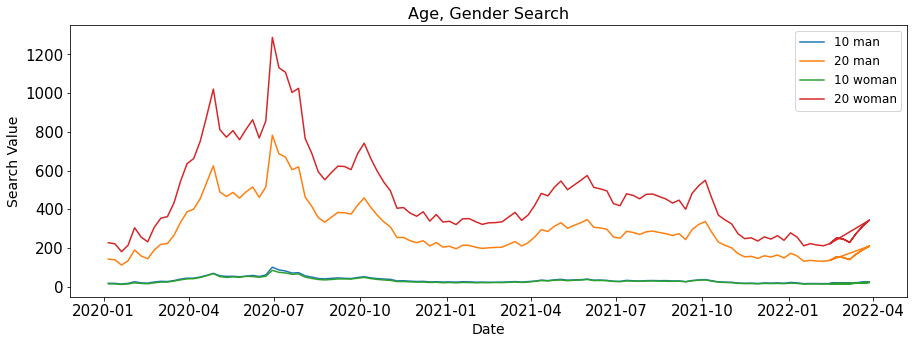

In [176]:
fig = plt.figure(figsize=(15, 5)) 
ax = fig.add_subplot() 
ax.plot(searcher['일'], searcher['캠핑 10대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 20대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 10대 여성']) 
ax.plot(searcher['일'], searcher['캠핑 20대 여성']) 
plt.title('Age, Gender Search', fontsize=16) 
plt.xlabel('Date', fontsize=14) 
plt.ylabel('Search Value', fontsize=14) 
plt.legend(['10 man', '20 man', '10 woman', '20 woman'], fontsize=12, loc='best') 
plt.show()
# 10대, 20대 남녀별로 구분한 그래프


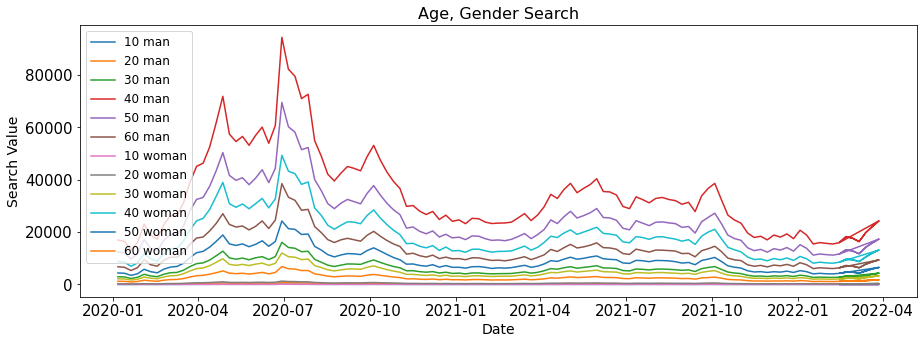

In [177]:
fig = plt.figure(figsize=(15, 5)) 
ax = fig.add_subplot() 
ax.plot(searcher['일'], searcher['캠핑 10대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 20대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 30대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 40대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 50대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 60대 남성']) 
ax.plot(searcher['일'], searcher['캠핑 10대 여성']) 
ax.plot(searcher['일'], searcher['캠핑 20대 여성']) 
ax.plot(searcher['일'], searcher['캠핑 30대 여성']) 
ax.plot(searcher['일'], searcher['캠핑 40대 여성']) 
ax.plot(searcher['일'], searcher['캠핑 50대 여성']) 
ax.plot(searcher['일'], searcher['캠핑 60대 여성']) 
plt.title('Age, Gender Search', fontsize=16) 
plt.xlabel('Date', fontsize=14) 
plt.ylabel('Search Value', fontsize=14) 
plt.legend(['10 man', '20 man', '30 man', '40 man', '50 man', '60 man', '10 woman', 
'20 woman', '30 woman', '40 woman', '50 woman', '60 woman'], fontsize=12, loc='best') 
plt.show()

# 나이, 성별 별로 검색어 검색 비율 그래프화